<a href="https://colab.research.google.com/github/Dileep2896/computer_vision/blob/main/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Recognition

## LBPH (Local Binary Patterns Histograms)

This alogrithm is good for light and dark images

### Loading the datasets

* Yale face database: http://vision.ucsd.edu/content/yale-face-database

In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip'

# uncompress the zip file
zip_obj = zipfile.ZipFile(file=path, mode='r')
zip_obj.extractall('./')
zip_obj.close()

### Pre-processing the images

In [3]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject04.sad.gif', 'subject02.sad.gif', 'subject10.normal.gif', 'subject11.sleepy.gif', 'subject10.sleepy.gif', 'subject01.surprised.gif', 'subject10.rightlight.gif', 'subject14.wink.gif', 'subject15.leftlight.gif', 'subject06.glasses.gif', 'subject11.leftlight.gif', 'subject13.surprised.gif', 'subject01.normal.gif', 'subject03.centerlight.gif', 'subject08.noglasses.gif', 'subject03.wink.gif', 'subject06.wink.gif', 'subject08.glasses.gif', 'subject07.noglasses.gif', 'subject11.surprised.gif', 'subject04.happy.gif', 'subject06.sleepy.gif', 'subject08.happy.gif', 'subject14.happy.gif', 'subject15.centerlight.gif', 'subject02.rightlight.gif', 'subject12.leftlight.gif', 'subject12.centerlight.gif', 'subject12.happy.gif', 'subject08.sad.gif', 'subject07.wink.gif', 'subject10.noglasses.gif', 'subject15.wink.gif', 'subject02.noglasses.gif', 'subject01.wink.gif', 'subject04.rightlight.gif', 'subject08.surprised.gif', 'subject15.happy.gif', 'subject02.wink.gif', 'subject11.normal.gif', 'subj

In [41]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
  # print(paths)
  faces = []
  ids = []
  for path in paths:
    # print(path)
    image = Image.open(path).convert('L')
    # print(type(image))
    image_np = np.array(image, 'uint8')
    # print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    # print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [42]:
ids, faces = get_image_data()

In [44]:
ids, len(ids)

(array([ 4,  2, 10, 11, 10,  1, 10, 14, 15,  6, 11, 13,  1,  3,  8,  3,  6,
         8,  7, 11,  4,  6,  8, 14, 15,  2, 12, 12, 12,  8,  7, 10, 15,  2,
         1,  4,  8, 15,  2, 11,  8,  5, 13, 13,  9, 14, 12, 12,  3, 11, 13,
         4, 10,  9,  9, 15,  5, 11,  2,  4,  8, 14, 11, 13, 15,  5, 10,  5,
        10,  2,  9,  6,  5,  6,  4,  6,  7,  7,  7,  9, 13, 13, 13,  9,  7,
         3, 12,  1, 15,  3,  8,  6, 14, 14,  9,  3,  2, 10,  3,  7, 14,  5,
        10, 13,  5,  8, 12,  3,  2,  1, 15,  5,  6, 12,  1, 11, 15, 11,  1,
        14,  9,  6,  2,  1, 14,  9, 12,  7,  1,  5,  4,  4,  7,  4,  3]), 135)

In [45]:
faces, len(faces)

([array([[130, 130, 130, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 251, 255, 255],
         [255, 255, 255, ..., 225, 236, 244],
         [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
  array([[109, 111, 124, ..., 255, 255, 241],
         [235, 238, 255, ..., 255, 255, 245],
         [252, 255, 255, ..., 255, 252, 244],
         ...,
         [255, 255, 255, ..., 186, 180, 180],
         [255, 255, 255, ..., 181, 179, 175],
         [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
  array([[130, 130, 130, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 244, 255, 255],
         [255, 255, 255, ..., 238, 242, 255],
         [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
  array([[130, 130, 130, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255,

In [46]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 251, 255, 255],
        [255, 255, 255, ..., 225, 236, 244],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), (243, 320))

### Training the LBPH classifier

In [90]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 3, neighbors = 12, grid_x = 10, grid_y = 10)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

### Recognizing faces

In [91]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [92]:
test_image = '/content/yalefaces/test/subject10.sad.gif'

In [93]:
# Pre-processing the test image

image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [94]:
image_np.shape

(243, 320)

In [95]:
predict = lbph_face_classifier.predict(image_np)

In [96]:
predict

(10, 35.98151357032959)

In [97]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))

In [98]:
expected_output

10

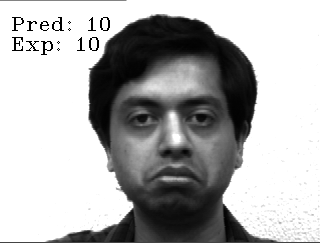

In [99]:
cv2.putText(image_np, 'Pred: ' + str(predict[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [100]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []

for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [101]:
type(predictions)
predictions = np.array(predictions)

In [102]:
type(expected_outputs)
expected_outputs = np.array(expected_outputs)

In [103]:
predictions

array([12,  3,  4,  5, 14,  1,  6, 14, 13, 14,  9, 11,  8,  5,  9, 12,  4,
       11,  4, 15,  7,  9, 12, 13,  3,  4, 10,  7,  4,  7])

In [104]:
expected_outputs

array([12,  3,  4,  5, 14,  1,  6,  6, 13, 14,  7, 11,  8,  5,  9,  2, 10,
       11,  1, 15,  7,  4, 12, 13,  3,  8, 10,  9,  2, 15])

In [105]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(expected_outputs, predictions)

In [106]:
accuracy

0.6666666666666666

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected_outputs, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

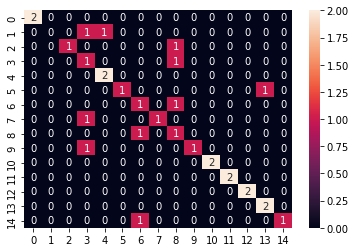

In [72]:
import seaborn

seaborn.heatmap(cm, annot=True);

## LBPH Arguments to increase the accuracy

* threshold: 1.7976931348623157e+308
* radius: 1
* neighbors: 8
* grid_x: 8
* grid_y: 8

## Dlib

In [3]:
import dlib

### Detecting facial points

In [4]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')

In [5]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/people2.jpg')

In [6]:
face_detection = face_detector(image, 1)

In [7]:
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0, 255, 255), 1)

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)

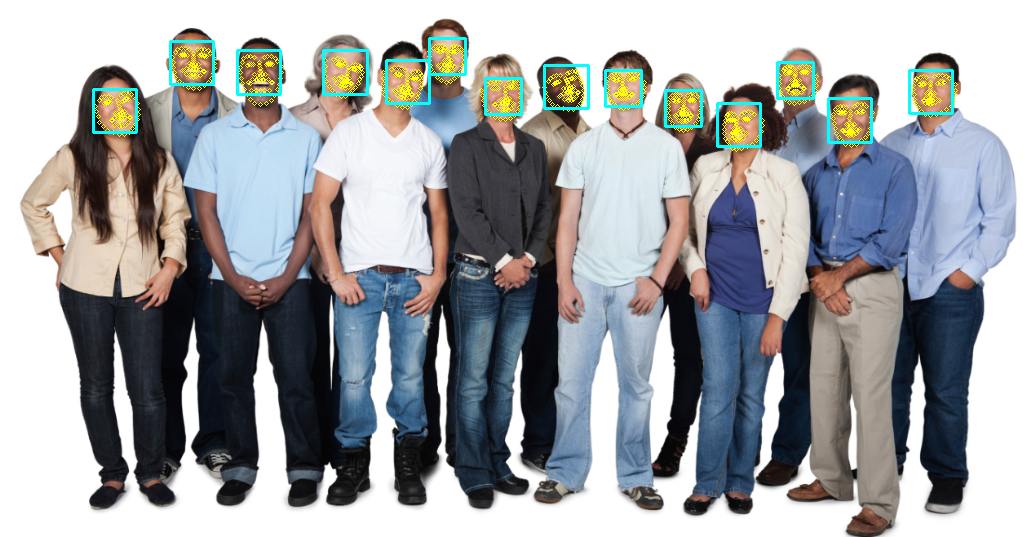

In [8]:
cv2_imshow(image)

### Detecting facial descriptors

In [9]:
import os

In [10]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [11]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  # print(path)
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (255, 255, 0), 2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 255), 1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    # print(type(face_descriptor))
    # print(len(face_descriptor))
    # print(face_descriptor)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.array(face_descriptor, dtype=np.float64)

    face_descriptor = face_descriptor[np.newaxis, :]
    # print(face_descriptor.shape)
    # print(face_descriptor)

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

    index[idx] = path
    idx += 1
  
  # cv2_imshow(image_np)

In [12]:
face_descriptors.shape

(132, 128)

In [13]:
len(index)

132

In [14]:
face_descriptors

array([[-0.16385633,  0.1314961 ,  0.09182203, ..., -0.12416515,
         0.09055299,  0.08724853],
       [-0.10501196,  0.10510928,  0.10506725, ..., -0.03870133,
         0.11492278,  0.04465222],
       [-0.19795901,  0.14981055,  0.0721289 , ..., -0.02090574,
         0.11914934,  0.0392248 ],
       ...,
       [-0.20028965,  0.14486608,  0.0316998 , ..., -0.02530335,
         0.09394174,  0.03082148],
       [-0.17025469,  0.02601384,  0.07275418, ...,  0.01264918,
         0.11138599,  0.06714495],
       [-0.14715302,  0.16794644,  0.07316704, ..., -0.04446573,
         0.18237182,  0.01522176]])

In [15]:
index

{0: '/content/yalefaces/train/subject03.sleepy.gif',
 1: '/content/yalefaces/train/subject14.centerlight.gif',
 2: '/content/yalefaces/train/subject06.sleepy.gif',
 3: '/content/yalefaces/train/subject10.normal.gif',
 4: '/content/yalefaces/train/subject05.noglasses.gif',
 5: '/content/yalefaces/train/subject07.noglasses.gif',
 6: '/content/yalefaces/train/subject03.sad.gif',
 7: '/content/yalefaces/train/subject10.rightlight.gif',
 8: '/content/yalefaces/train/subject09.leftlight.gif',
 9: '/content/yalefaces/train/subject09.noglasses.gif',
 10: '/content/yalefaces/train/subject12.happy.gif',
 11: '/content/yalefaces/train/subject12.sad.gif',
 12: '/content/yalefaces/train/subject15.leftlight.gif',
 13: '/content/yalefaces/train/subject01.surprised.gif',
 14: '/content/yalefaces/train/subject07.glasses.gif',
 15: '/content/yalefaces/train/subject12.surprised.gif',
 16: '/content/yalefaces/train/subject14.glasses.gif',
 17: '/content/yalefaces/train/subject12.glasses.gif',
 18: '/conte

### Calculating distance between faces

In [16]:
np.linalg.norm(face_descriptors[131] - face_descriptors[131])

0.0

In [18]:
np.linalg.norm(face_descriptors[131] - face_descriptors[130])

0.7551642468792437

In [19]:
np.linalg.norm(face_descriptors[131] - face_descriptors[129])

0.5320749109606359

In [21]:
np.linalg.norm(face_descriptors[131] - face_descriptors[92])

0.3180990069803762

In [25]:
np.linalg.norm(face_descriptors[0] - face_descriptors, axis = 1)

array([0.        , 0.62151827, 0.56065301, 0.67447468, 0.61517722,
       0.67731133, 0.40922001, 0.66509854, 0.69737895, 0.551901  ,
       0.62682483, 0.63413775, 0.61276759, 0.75548693, 0.67544773,
       0.64296692, 0.60291017, 0.72109889, 0.61824109, 0.59315424,
       0.68334204, 0.70821258, 0.69584348, 0.71344076, 0.6132484 ,
       0.70820695, 0.64319896, 0.60324424, 0.70654206, 0.68070437,
       0.5527708 , 0.65749544, 0.72754943, 0.60483368, 0.68442056,
       0.551901  , 0.69586659, 0.57394805, 0.49516901, 0.58022572,
       0.57705207, 0.52534852, 0.58223225, 0.75075673, 0.64839151,
       0.56627271, 0.59852231, 0.4916225 , 0.65194552, 0.55107478,
       0.54472368, 0.64707978, 0.69107396, 0.61913438, 0.67731133,
       0.67291514, 0.71091893, 0.63278793, 0.56594655, 0.55629633,
       0.50860562, 0.57727862, 0.67423122, 0.67706156, 0.69214839,
       0.57041751, 0.49396976, 0.53652766, 0.59043803, 0.68492339,
       0.64019824, 0.56409995, 0.68712217, 0.40784662, 0.56360

In [26]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1))

106

In [27]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)[106]

0.359287230798563

### Detecting faces with Dlib

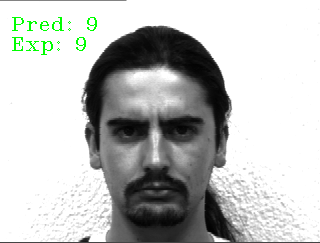

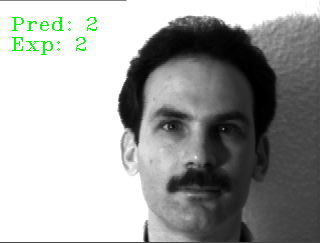

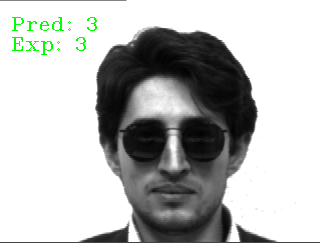

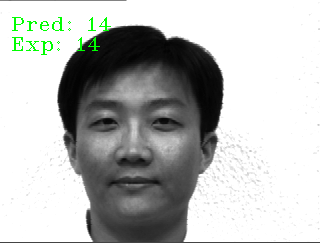

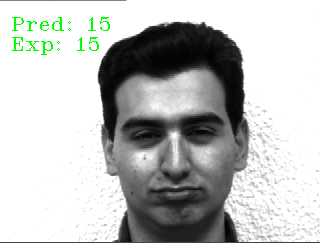

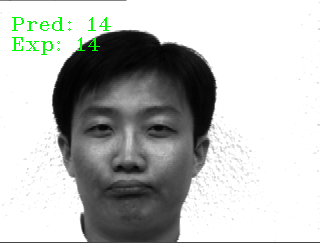

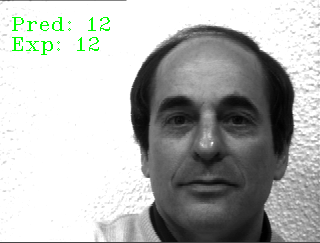

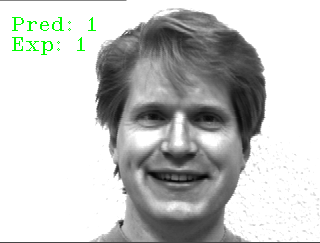

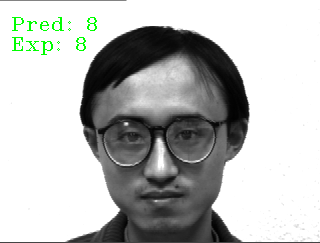

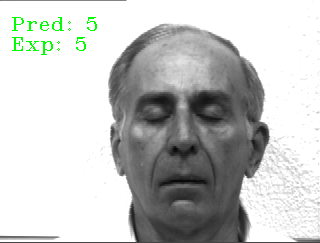

Not Identified


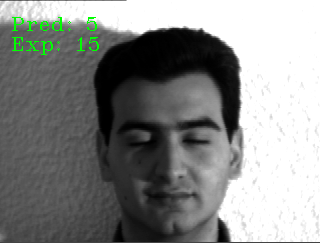

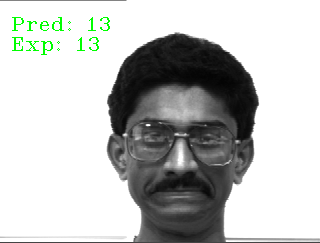

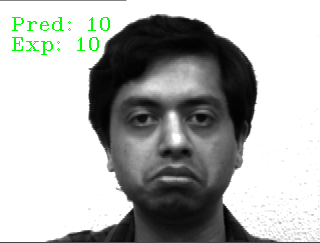

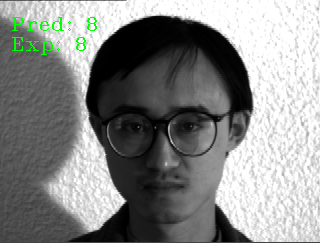

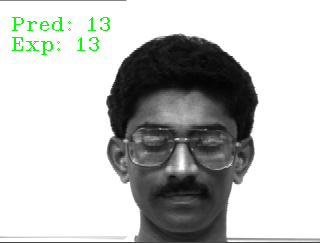

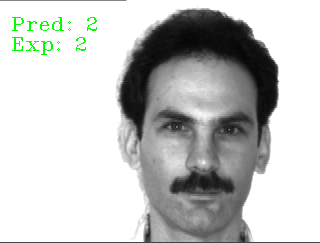

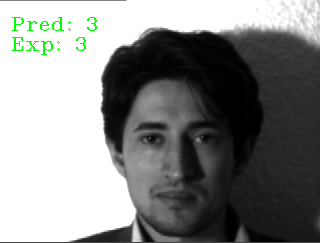

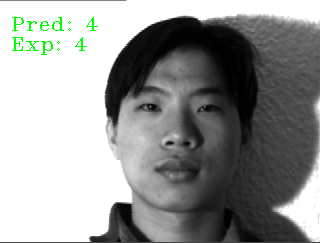

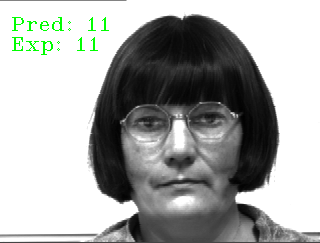

Not Identified


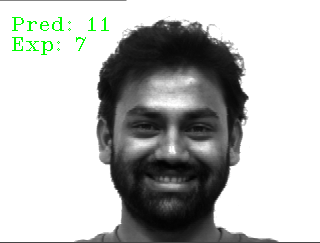

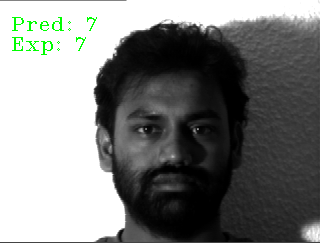

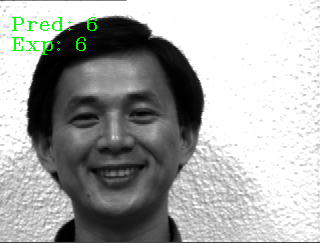

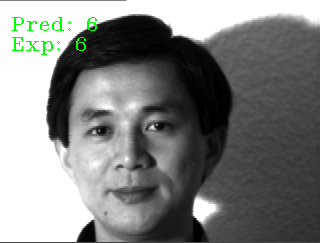

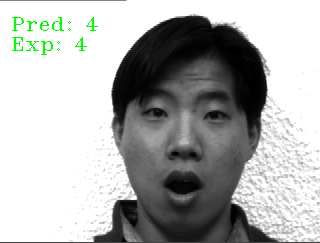

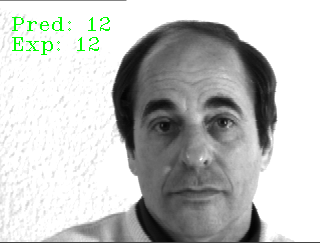

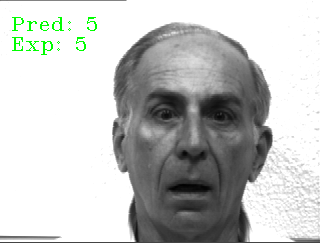

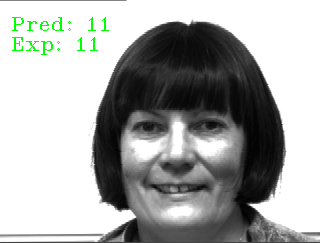

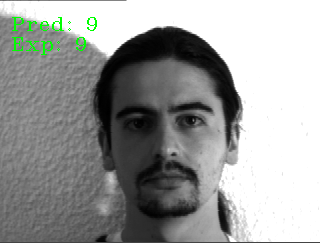

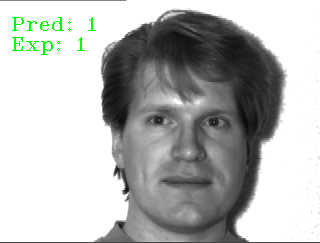

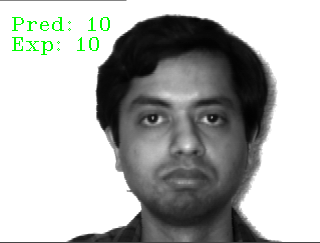

In [31]:
threshold = 0.5
predictions = []
expected_output = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')

  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    points = points_detector(image_np, face)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      print('Not Identified')
    
    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_output.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
    cv2.putText(image_np, 'Exp: ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))

  cv2_imshow(image_np)

In [32]:
predictions = np.array(predictions)
expected_output = np.array(expected_output)

In [33]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(expected_output, predictions)

In [34]:
acc

0.9333333333333333

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected_output, predictions)

In [36]:
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

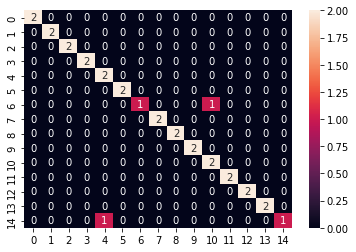

In [38]:
import seaborn

seaborn.heatmap(cm, annot=True);